# Data Go
*Be a data analyst before becoming a pokemon trainer*
<br>
![alt text](https://media1.tenor.com/images/fe7a0f4ebf9149d79d47ff7a01926b18/tenor.gif?itemid=12055186)


 


Datset is downloaded from https://www.kaggle.com/abcsds/pokemon/download

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset Description :
*  ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round



In [100]:
data=pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [101]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [102]:
data.shape
data.drop("#",axis=1,inplace=True);

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [104]:
data["Type 2"].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type 2, dtype: object

In [105]:
categorical=["Name","Type 1","Type 2"]
numerical=data.columns ^ categorical
numerical

Index(['Attack', 'Defense', 'Generation', 'HP', 'Legendary', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Total'],
      dtype='object')

In [106]:
data[numerical].describe()

,Attack,Defense,Generation,HP,Sp. Atk,Sp. Def,Speed,Total
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,79.001250,73.842500,3.32375,69.258750,72.820000,71.902500,68.277500,435.10250
std,32.457366,31.183501,1.66129,25.534669,32.722294,27.828916,29.060474,119.96304
min,5.000000,5.000000,1.00000,1.000000,10.000000,20.000000,5.000000,180.00000
25%,55.000000,50.000000,2.00000,50.000000,49.750000,50.000000,45.000000,330.00000
50%,75.000000,70.000000,3.00000,65.000000,65.000000,70.000000,65.000000,450.00000
75%,100.000000,90.000000,5.00000,80.000000,95.000000,90.000000,90.000000,515.00000
max,190.000000,230.000000,6.00000,255.000000,194.000000,230.000000,180.000000,780.00000


In [107]:
data[categorical].describe().head(4)

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Electrode,Water,Flying
freq,1,112,97


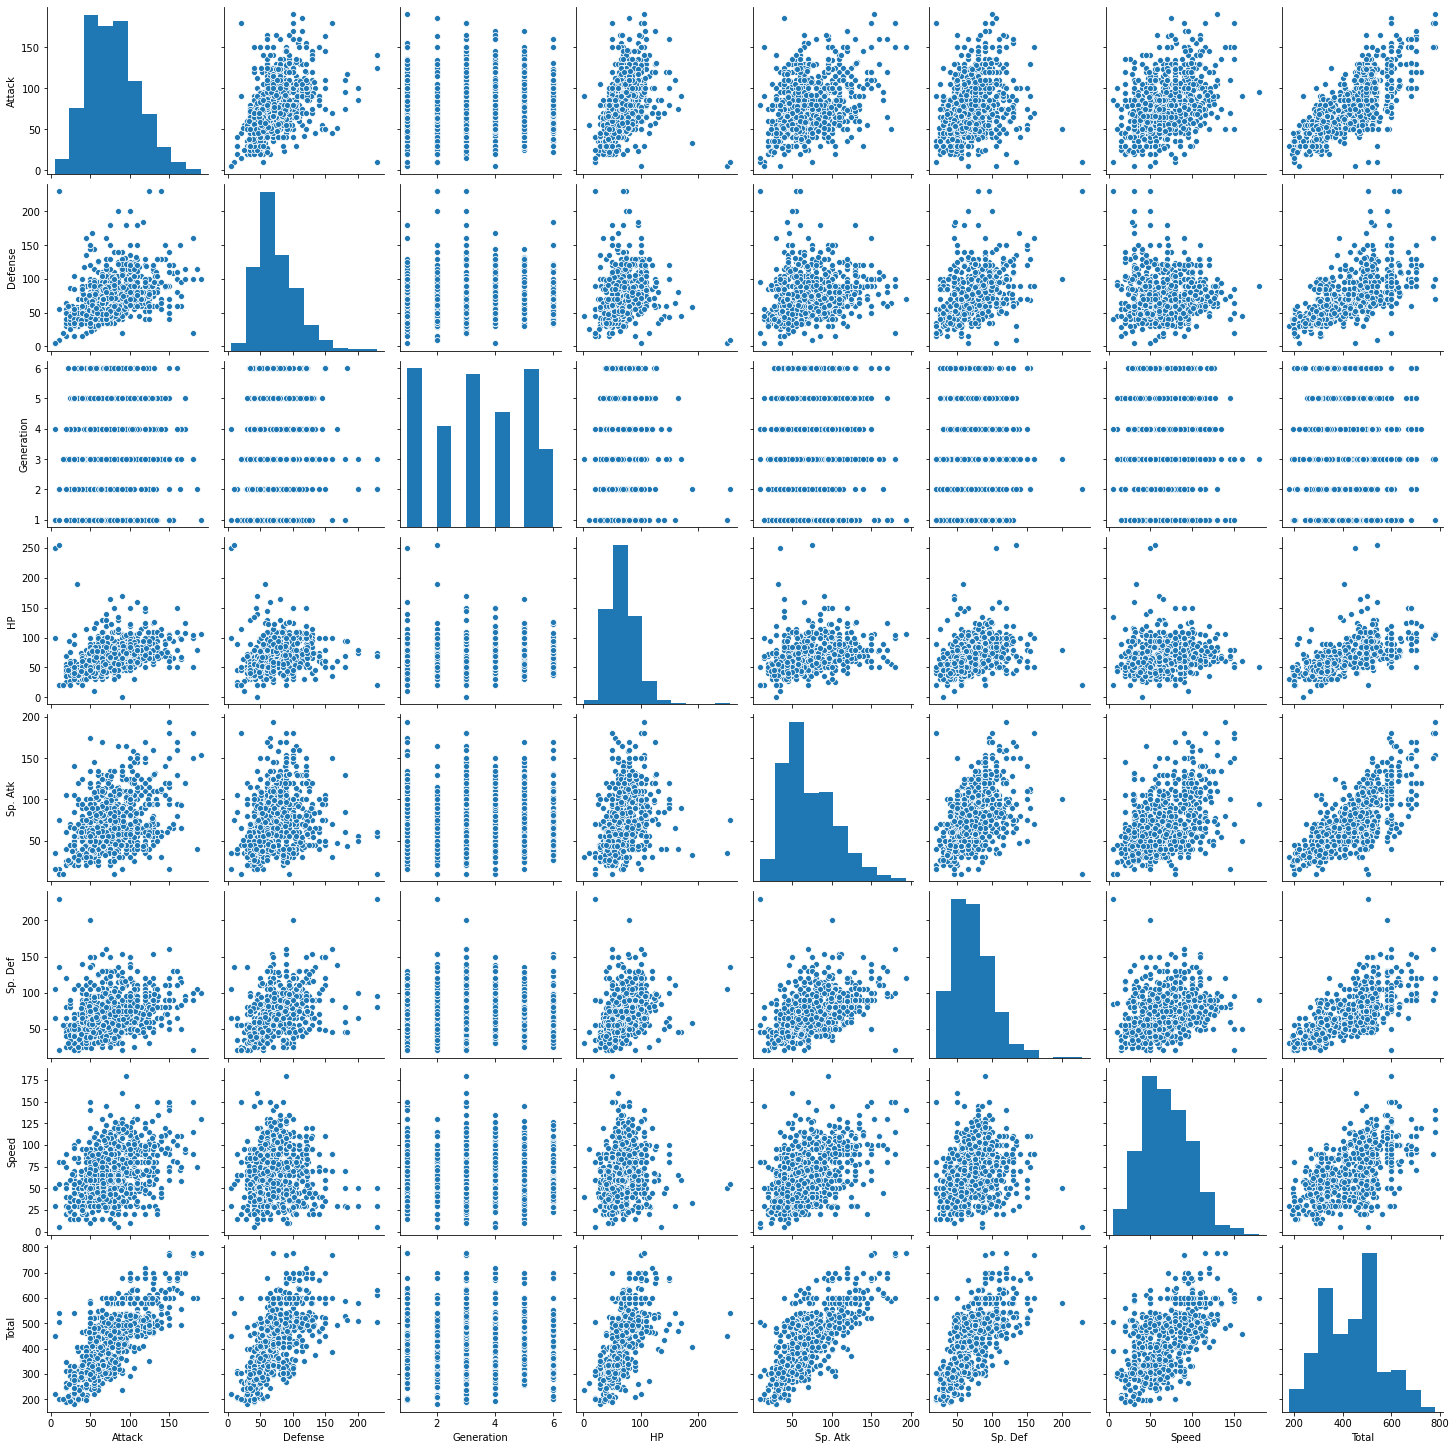

In [108]:
cols=list(numerical)
cols.remove("Legendary")

sns.pairplot(data[cols])


# Type 1

Text(0.5, 1.0, 'Type_1')

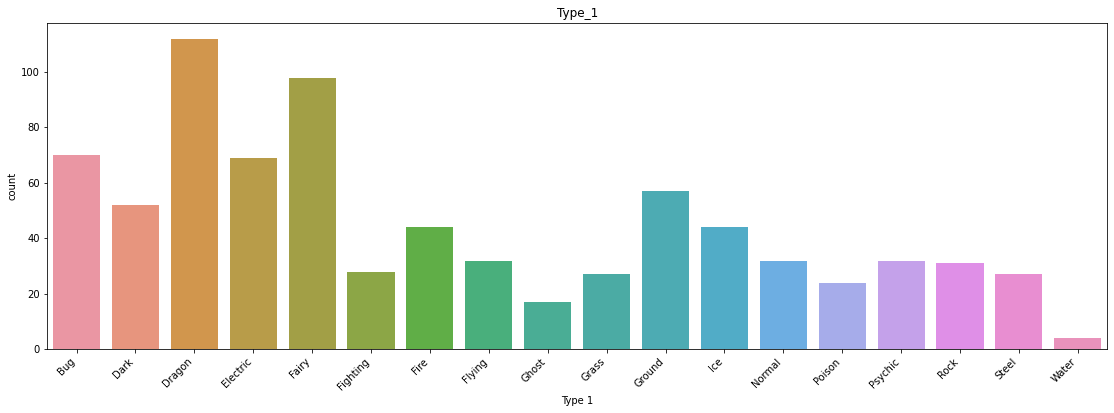

In [109]:
fig,ax=plt.subplots(1,1,figsize=(19,6))
df=data.sort_values(by='Type 1', ascending=False)

sns.countplot(data["Type 1"])
ax.set_xticks(range(len(np.unique(data["Type 1"].values))))
ax.set_xticklabels(np.unique(data["Type 1"].values), rotation=45, ha='right')
ax.set_title('Type_1')



# Type 2

Text(0.5, 1.0, 'Type_2')

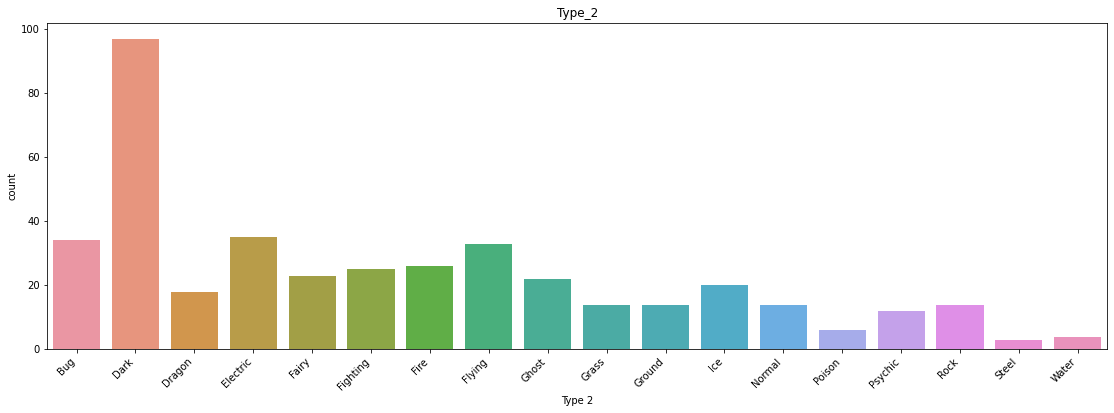

In [110]:
fig,ax=plt.subplots(1,1,figsize=(19,6))
sns.countplot(data["Type 2"].dropna())
ax.set_xticks(range(len(np.unique(data["Type 2"].dropna().values))))
ax.set_xticklabels(np.unique(data["Type 2"].dropna().values), rotation=45, ha='right')
ax.set_title('Type_2')



# Attack and Special Attack

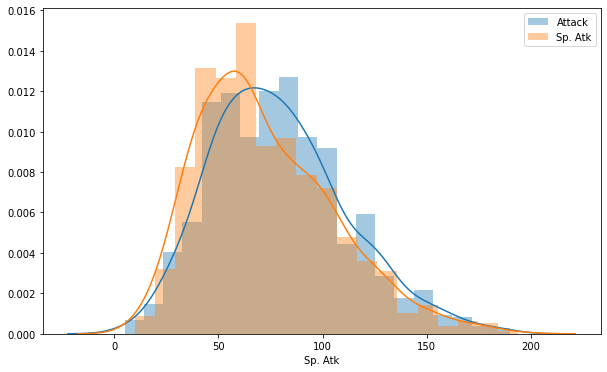

In [113]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Attack"],label="Attack")
sns.distplot(data["Sp. Atk"],label="Sp. Atk")
plt.legend()

# Defense and Special Defense

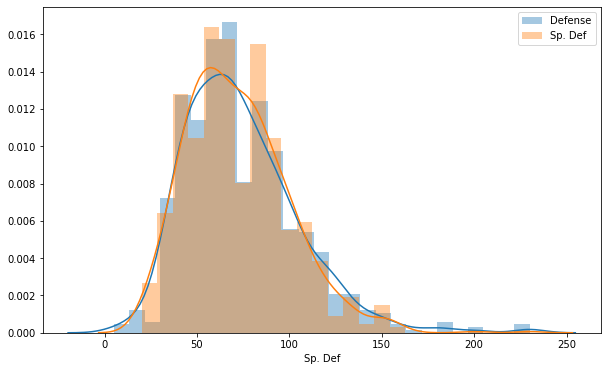

In [114]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Defense"],label="Defense")
sns.distplot(data["Sp. Def"],label="Sp. Def")
plt.legend()

# Speed and HP

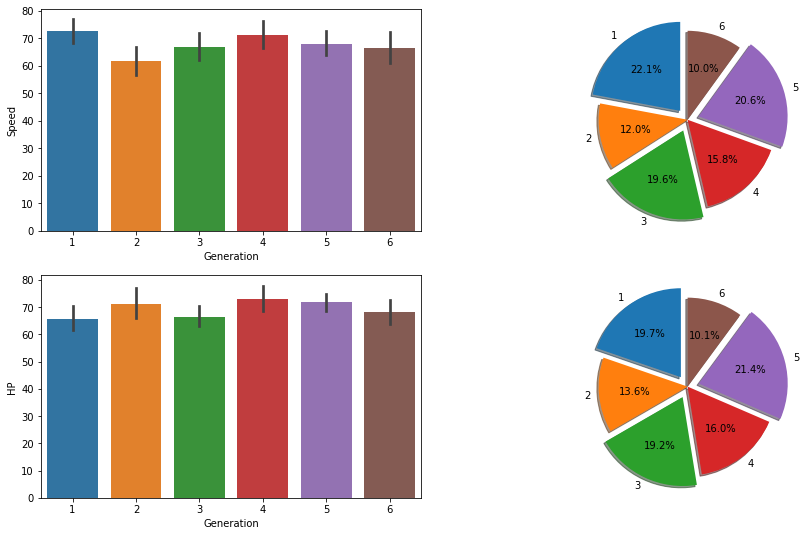

In [115]:
fig,ax=plt.subplots(2,2,figsize=(15,9))
sns.barplot(x=data["Generation"],y=data["Speed"],ax=ax[0][0])
ax[0][0].set_xlabel("Generation")
ax[0][0].set_ylabel("Speed")

sns.barplot(x=data["Generation"],y=data["HP"],ax=ax[1][0])
ax[1][0].set_xlabel("Generation")
ax[1][0].set_ylabel("HP")




df=data.copy()
df=df.groupby(["Generation"]).sum()

labels =range(1,7)
colors = sns.color_palette() 
explode =(0.13,0,0.13,0,0.13,0) 

ax[0][1].pie(100.0*df["Speed"]/sum(df["Speed"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True); 
ax[1][1].pie(100.0*df["HP"]/sum(df["HP"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True); 









# Total Power and Legendary

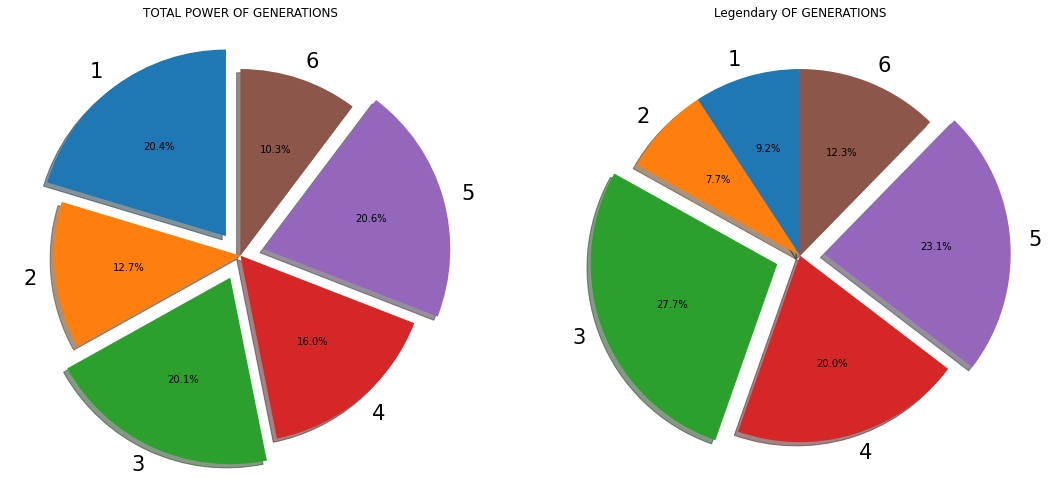

In [116]:

df=data.copy()
df=df.groupby(["Generation"]).sum()
fig,ax=plt.subplots(1,2,figsize=(16,7))

labels =range(1,7)
colors = sns.color_palette() 
explode =(0.13,0,0.13,0,0.13,0) 
# fig, ax1 = plt.subplots(figsize = (19,6)) 
patches, texts, autotexts=ax[0].pie(100.0*df["Total"]/sum(df["Total"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
[ i.set_fontsize(21) for i in texts]

ax[0].set_title("TOTAL POWER OF GENERATIONS")
explode =(0,0,0.13,0,0.13,0) 

patches, texts, autotexts=ax[1].pie(100.0*df["Legendary"]/sum(df["Legendary"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
ax[1].set_title("Legendary OF GENERATIONS")
[ i.set_fontsize(21) for i in texts]

plt.tight_layout() 
plt.show()
# df

* top 3 in powers are gen 1,3,5
* top 3 in legendary are gen 3 and 5



---
let us look over quatitave data like Attack,Defense,HP,Sp.Atk,Sp.Def and Speed.


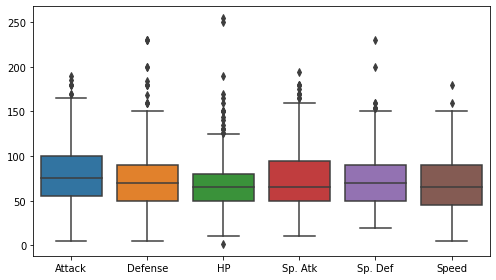

In [128]:
fig,ax=plt.subplots(1,1,figsize=(7,4))

cols=list(numerical)
cols.remove("Generation")
cols.remove("Legendary")
cols.remove("Total")
sns.boxplot(data=data[cols]);
plt.tight_layout()
# cols

* Here, It shows there are many outliers in our data.
* If you look over hp it have outlier of low and high both.
* Hp also have highest outlier.
* Thus our data also seem to have large variance.


---

let us plot these qunatiative over each generations

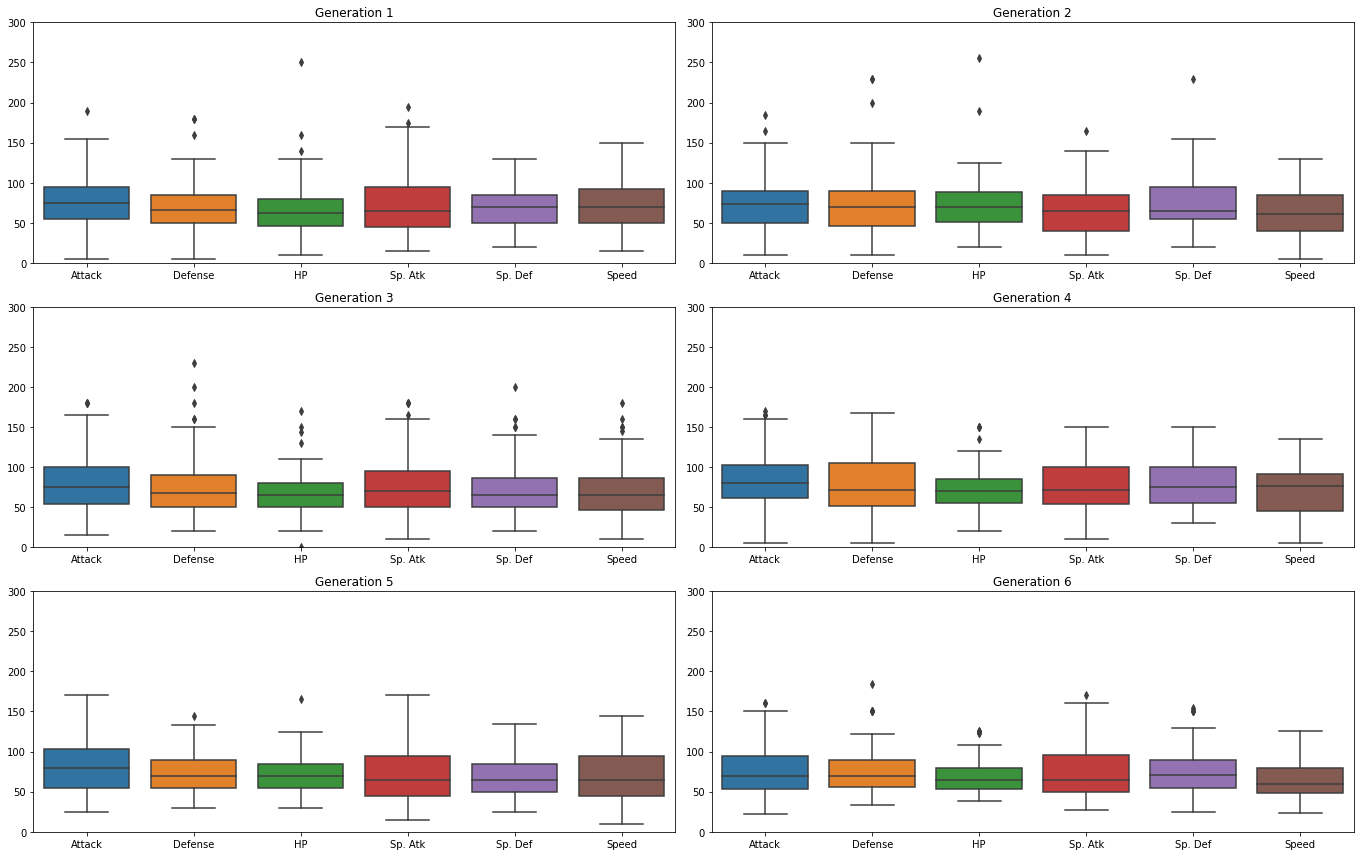

In [134]:
fig,ax=plt.subplots(3,2,figsize=(19,12))
index=1
for i in range(3):
  for j in range(2):
    df=data.loc[data["Generation"]==index]
    sns.boxplot(data=df[cols],ax=ax[i][j])
    ax[i][j].set_title("Generation "+str(index))
    ax[i][j].set_ylim([0,300])
    index+=1
plt.tight_layout()

Here it seems Generation 1,3,5 are seems to have high  variance  in sp.attack,speed,hp .


---

# TOP 3
So let us see **TOP 3** from each Geneartion.<br>

<img src="https://media3.giphy.com/media/DRfu7BT8ZK1uo/giphy.gif?cid=ecf05e47d88c7fe99a8824447f213b159ff6c21107f17ae1&rid=giphy.gif" width="270">

In [189]:
df=data.groupby(["Generation"])
temp=df["Total"].max()
best=[]
index=1
for i in [1,3,5]:
  best.append(data.loc[(data["Total"]==temp[i]) & (data["Generation"]==i)].head(1))
  
top3_total=pd.concat([data.iloc[best[0].index[0]],data.iloc[best[1].index[0]],data.iloc[best[2].index[0]]],axis=1).transpose()
top3_total


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True




<table>
<tr>
<td>
MewtwoMega Mewtwo X (Gen 1)	
</td>

<td>RayquazaMega Rayquaza	(Gen 3)
</td>

<td>KyuremBlack Kyurem (Gen 5)
</td>
</tr>
<tr>
<td>
<img src="https://in.portal-pokemon.com/play/resources/pokedex/img/pm/dc96945bf5cb7f776f0272bf17ebf0d4593a5849.png" width="300" />   
</td><td>
<img src="https://i.pinimg.com/originals/67/90/69/679069c001a2f3165fe6260ecb00c883.png" width="300" />   
</td><td>

<img src="https://static.pokemonpets.com/images/monsters-images-800-800/4071-Kyurem-Black.png" width="300" />   

</td>
</tr>
</table>

